### **Import Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline

###**Read Data**

In [10]:
## homedepot.com data
product_descriptions = pd.read_csv("product_descriptions.csv",  quoting=3, error_bad_lines=False, encoding='utf-8')

b'Skipping line 3: expected 6 fields, saw 19\nSkipping line 4: expected 6 fields, saw 10\nSkipping line 7: expected 6 fields, saw 15\nSkipping line 12: expected 6 fields, saw 12\nSkipping line 13: expected 6 fields, saw 16\nSkipping line 14: expected 6 fields, saw 9\nSkipping line 15: expected 6 fields, saw 9\nSkipping line 16: expected 6 fields, saw 9\nSkipping line 17: expected 6 fields, saw 8\nSkipping line 22: expected 6 fields, saw 8\nSkipping line 23: expected 6 fields, saw 13\nSkipping line 24: expected 6 fields, saw 9\nSkipping line 25: expected 6 fields, saw 16\nSkipping line 30: expected 6 fields, saw 11\nSkipping line 32: expected 6 fields, saw 7\nSkipping line 34: expected 6 fields, saw 8\nSkipping line 41: expected 6 fields, saw 9\nSkipping line 44: expected 6 fields, saw 12\nSkipping line 46: expected 6 fields, saw 11\nSkipping line 49: expected 6 fields, saw 10\nSkipping line 50: expected 6 fields, saw 12\nSkipping line 51: expected 6 fields, saw 11\nSkipping line 55: ex

### **EDA**

In [11]:
product_descriptions.shape

(23855, 2)

In [12]:
product_descriptions.columns

Index(['"product_uid"', '"product_description"'], dtype='object')

In [13]:
product_descriptions.head()

,,,,"""product_uid""","""product_description"""
100001,"""Not only do angles make joints stronger",they also provide more consistent,straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present,use our ZMAX zinc-coated connectors,which provide extra resistance against corros...
100004,"""The Grape Solar 265-Watt Polycrystalline PV Solar Panel bonus pack bundles 4 Grape Solar 265-Watt solar panels for extra savings. The Grape Solar 265-Watt Polycrystalline PV Solar Panel uses high efficiency solar cells (approximately 19%) made from quality silicon material for high module conversion efficiency",long term output stability,and reliability. Virtually maintenance free. High transmittance,low iron tempered glass for durability and en...,NaN
100005,"""Update your bathroom with the Delta Vero Single-Handle Shower Faucet Trim Kit in Chrome. It has a sleek",modern and minimalistic aesthetic. The MultiChoice universal valve keeps the water temperature within +/-3 degrees Fahrenheit to help prevent scalding.California residents: see&nbsp;Proposition 65 informationIncludes the trim kit only,the rough-in kit (R10000-UNBX) is sold separatelyIncludes the handleMaintains a balanced pressure of hot and cold water even when a valve is turned on or off elsewhere in the systemDue to WaterSense regulations in the state of New York,please confirm your shipping zip code is not ...,NaN
100007,"""The Quantum Adjustable 2-Light LED Black Emergency Lighting Unit from Lithonia Lighting provides a minimum of 90 minutes of illumination upon loss of power. Adjust the direction of light using the unique track-and-swivel design of the 2 heads. This unit is ideal for applications requiring attractive equipment with quick installation.Advanced LED technology is dependable and energy efficient2 adjustable heads allow you to direct light where it is neededEngineering-grade thermoplastic housing is impact-resistant",scratch-resistant and corrosion-proofIntegrated LEDs means no bulbs are requiredTypical life of the LEDs is 10 years of maintenance-free operationBlack housing has a compact low-profile designSealed,"maintenance-free Ni-cad battery delivers 90 minute capacity to the LEDsDual voltage input capability (120 to 277-volt)Easily installs to wall or ceilingUL damp-location listed""",NaN,NaN
100008,"""The Teks #10 x 1-1/2 in. Zinc-Plated Steel Washer-Head Hex Self-Tapping Drill-Point Screws (90-Pack) helps you fasten metal to metal. The steel screw is ideal for use with metal of a thicker gauge. Drill point and flute remove material and size holes for threads. Install using a standard screw gun (not included) and a 5/16 in. hex drive bit (not included). No pre-drilling required.For metal to metal fasteningIdeal for use with metal of a thicker gaugeUse with HVAC","electrical and door applicationsScrews tap their own headsSteel construction1-1/2 in. longZinc-plated""",NaN,NaN,NaN


In [14]:
product_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23855 entries, (100001, '"Not only do angles make joints stronger', ' they also provide more consistent', ' straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present') to (141362, '"Large deep green leaves have the familiar shape of a grape plant', ' but instead of vining', ' this plant forms a low mounding clump that spreads with a habit like that of a ground cover. Blooms are a dark pink to almost mauve color')
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   "product_uid"          8103 non-null   object
 1   "product_description"  3763 non-null   object
dtypes: object(2)
memory usage: 3.3+ MB


###**Preprocessing**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,,,,"""product_uid""","""product_description"""
100001,"""Not only do angles make joints stronger",they also provide more consistent,straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present,use our ZMAX zinc-coated connectors,which provide extra resistance against corros...
100017,"""The MD Building Products 36 in. x 36 in. x 1/50 in. Aluminum Cloverleaf Natural Sheet with mill finish is lightweight",strong and rust resistant,making it suitable for a variety of home repair projects. Easy to cut or form,it features a stylish cloverleaf design.Use t...,or add stylish accents to room dividers and c...
100028,"""Reed fencing is a convenient and cost effective way to add texture and a dynamic aesthetic to your home and garden. This fencing is constructed from fresh water reed that grows abundantly along river banks",wetlands,and estuaries. The pre-assembled panels are carefully woven together by vinyl coated wire to ensure durability while remaining seamless. This lightweight material is perfect for easily covering unsightly structures such as old fencing,or it can add a tropical aesthetic to your la...,the abundant growth rate of fresh water reed ...
100032,"""The NorskWall NSNW4PK Panel Kit is an innovative modular system which allows users to add space to their garage wall as they need it. NorskWall panels have a patented Slatwall Kwik-Connect feature which allows each panel to quickly lock in place for easy installation. A single person can install NorskWall Panels",quickly adding storage to any space. The 4-piece kit covers 10 sq. ft. of wall space and comes with all of the screws and clips needed for installation. The wall system is compatible with hooks from many manufacturers. Our hooks and accessories are designed to handle heavier load specifications and our shelves,baskets and storage bags have more cubic feet of storage than any other product on the market giving you maximum storage and optimizing your storage space. NorskWall accessories are the most innovative wall storage products on the market.Versatile enough for the garage,basement,laundry room or for commercial display use in...
100038,"""RIDGID presents the X4 18-Volt 1/2 in. Impact Wrench as a console item. With console-only tools",you have the option to add on to existing kits to create your own. This compact and lightweight cordless tool delivers 325 ft. lbs. of torque to power through the most demanding applications and comes loaded with features such as exclusive grip light technology that engages the LED light simply by holding the tool,innovative Hex Grip for maximum comfort and a Tri-Beam LED for optimum illumination. Backed by RIDGID's lifetime service agreement,you can count on free batteries,free parts and free service for the entire li...


In [23]:
product_descriptions1 = product_descriptions[:500]
product_descriptions1['"product_description"'].head(10)

100001  "Not only do angles make joints stronger                                                                                                                                                                                                                                                                                        they also provide more consistent                                                                                                                                                                                                                                                                                             straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present                                  which provide extra resistance again

In [24]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1['"product_description"'])
X1

<500x3941 sparse matrix of type '<class 'numpy.float64'>'
	with 9928 stored elements in Compressed Sparse Row format>

###**Model Building**

In [25]:
from sklearn.cluster import KMeans

In [26]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

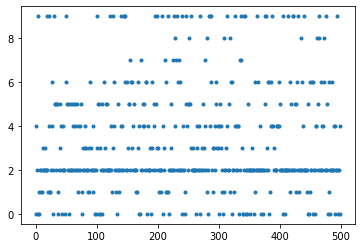

In [27]:
plt.plot(y_kmeans, ".")
plt.show()

###**Evaluation**

In [28]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [31]:
true_k = 10

In [32]:

print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 warranty
 limited
 lifetime
 year
 easy
 steel
 heat
 available
 add
 create
Cluster 1:
 product
 vary
 store
 tape
 concrete
 blanket
 usenote
 register
 ridgid
 white
Cluster 2:
 door
 use
 water
 ft
 provides
 used
 easy
 home
 handed
 16
Cluster 3:
 insulation
 20
 need
 guide
 support
 fan
 steel
 easy
 wood
 rpm
Cluster 4:
 sold
 separately
 installation
 corrosion
 strong
 easy
 extra
 drive
 screws
 install
Cluster 5:
 depot
 plan
 protection
 home
 free
 year
 8832
 consultation
 941
 schedule
Cluster 6:
 included
 lighting
 watt
 accessories
 bath
 lumbar
 maximum
 60
 easy
 support
Cluster 7:
 water
 page
 heater
 visit
 information
 naeca
 2015
 new
 meets
 installation
Cluster 8:
 according
 variation
 slightly
 advised
 selected
 exists
 size
 patterns
 shape
 vary
Cluster 9:
 volt
 cutting
 battery
 protection
 plan
 depot
 year
 ion
 compact
 lithium


###**Recommendation**

In [35]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = kmeans.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [36]:
show_recommendations("cutting tool")

Cluster 9:
 volt
 cutting
 battery
 protection
 plan
 depot
 year
 ion
 compact
 lithium
